In [1]:
from mne.datasets.sleep_physionet.age import fetch_data
ALICE, BOB = 0, 1
[alice_files, bob_files] = fetch_data(subjects=[ALICE, BOB], recording=[1])

Using default location ~/mne_data for PHYSIONET_SLEEP...


In [2]:
class a:
    def __init__(self, blou):
        self.blou = blou

In [3]:
bli = a(5)

In [17]:
class b:
    def __init__(self, a, blu):
        self = a
        self.bli = blu

In [18]:
k = b(bli, 5)

TypeError: __init__() should return None, not 'a'

In [19]:
k.bli

AttributeError: 'b' object has no attribute 'bli'

In [1]:
from braindecode.datautil.transform import Policy

ImportError: cannot import name 'datautil' from 'braindecode.datautil.transform_side_funcs' (/storage/store/work/sfreybur/braindecode/braindecode/datautil/transform_side_funcs.py)

In [2]:
fetch_data(subjects=list(range(15)))
fetch_data(subjects=list(range(15,20)))

Using default location ~/mne_data for PHYSIONET_SLEEP...
Using default location ~/mne_data for PHYSIONET_SLEEP...


[['/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4151E0-PSG.edf',
  '/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4151EC-Hypnogram.edf'],
 ['/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4152E0-PSG.edf',
  '/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4152EC-Hypnogram.edf'],
 ['/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4161E0-PSG.edf',
  '/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4161EC-Hypnogram.edf'],
 ['/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4162E0-PSG.edf',
  '/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4162EC-Hypnogram.edf'],
 ['/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4171E0-PSG.edf',
  '/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4171EU-Hypnogram.edf'],
 ['/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4172E0-PSG.edf',
  '/home/parietal/sfreybur/mne_data/physionet-sleep-data/SC4172EC-Hypnogram.edf'],
 ['/home/parietal/sfreybur/mne_data/physionet-

In [3]:
import mne
%load_ext autoreload
%autoreload 2
from ml_vs_dl import get_epochs_data, create_from_mne_epochs
import braindecode.datautil

In [3]:
train, test = get_epochs_data(train_subjects=[0], test_subjects=[1])

In [1]:
train_sample = create_from_mne_epochs(
    train,
    window_size_samples=3000,
    window_stride_samples=3000,
    drop_last_window=False)

test_sample = create_from_mne_epochs(
    test, window_size_samples=3000,
    window_stride_samples=3000,
    drop_last_window=False)

NameError: name 'create_from_mne_epochs' is not defined

In [2]:
train_sample

NameError: name 'train_sample' is not defined

In [1]:
import sys
sys.path.insert(1, '/storage/store/work/sfreybur/')
import braindecode.datautil

ImportError: cannot import name '_check_windowing_arguments' from 'braindecode.datautil.windowers' (/home/parietal/sfreybur/miniconda3/lib/python3.7/site-packages/braindecode/datautil/windowers.py)

In [ ]:
!pip install torchaudio

In [1]:
import braindecode

In [10]:
import transform_side_funcs
import mne
from ml_vs_dl import get_epochs_data
import torch
from braindecode.datasets import create_from_mne_epochs


In [3]:
epochs_train_list, epochs_test_list = get_epochs_data([0],[1])
epochs_train = mne.concatenate_epochs(epochs_train_list)
epochs_test = mne.concatenate_epochs(epochs_test_list)

In [4]:
train_sample = create_from_mne_epochs(
    epochs_train_list,
    window_size_samples=3000,
    window_stride_samples=3000,
    drop_last_window=False)

test_sample = create_from_mne_epochs(
    epochs_test_list, window_size_samples=3000,
    window_stride_samples=3000,
    drop_last_window=False)

In [5]:
x = torch.tensor([5.5, 3])

In [71]:
import torchaudio

def tensor_to_img(spectrogram): # arbitrary, looks good on my screen.
    for i in range(spectrogram.shape[0]):
        plt.imshow(spectrogram[i], cmap = 'YlGn', interpolation = 'sinc', vmin = -100, vmax = 100)
        plt.show();
    display(spectrogram.shape)


def transform(window, policy_list):
    n_fft = 512
    hop_length = 64
    win_length = n_fft
    spectrogram = torch.stft(window, n_fft=n_fft, 
                                  hop_length=hop_length,
                                  win_length=n_fft,
                                  window=torch.hann_window(n_fft))
    
    for policy in policy_list:
        spectrogram = policy.apply(spectrogram)
        
    to_plot = torch.norm(spectrogram, dim=3)
    to_plot = torchaudio.transforms.AmplitudeToDB().forward(to_plot)
    
    
    tensor_to_img(to_plot)
    augmented_window = torchaudio.functional.istft(spectrogram,    
                                                   n_fft=n_fft,
                                                   hop_length=hop_length,
                                                   win_length=n_fft,
                                                   window=torch.hann_window(n_fft))
    
    return(spectrogram)
    

In [72]:
import matplotlib.pyplot as plt

In [73]:
import inspect
test_sample.datasets[0].windows.load_data()
test = torch.tensor(test_sample.datasets[0].windows._data[0])

tensor([[[[ 5.1840e-03,  0.0000e+00],
          [ 3.7736e-03,  0.0000e+00],
          [ 8.6826e-04,  0.0000e+00],
          ...,
          [ 2.5453e-04,  0.0000e+00],
          [ 5.2187e-04,  0.0000e+00],
          [ 7.0710e-04,  0.0000e+00]],

         [[-7.7579e-03,  2.2204e-10],
          [-3.5664e-03, -6.1948e-03],
          [ 2.9334e-03, -4.4207e-03],
          ...,
          [-2.0477e-04,  5.9373e-04],
          [-6.0710e-04,  1.8578e-04],
          [-3.7718e-04, -1.5391e-04]],

         [[ 6.1824e-03,  3.3591e-10],
          [ 3.0070e-03,  5.9633e-03],
          [-5.6667e-03,  4.7297e-03],
          ...,
          [ 2.5851e-04, -7.2200e-04],
          [ 5.7344e-04,  1.6395e-04],
          [-9.6717e-05,  4.1441e-04]],

         ...,

         [[-4.9979e-05, -1.4909e-11],
          [ 4.5698e-06,  3.8760e-05],
          [ 1.0617e-05, -2.8967e-06],
          ...,
          [ 2.4735e-05,  4.0097e-06],
          [ 1.3185e-05, -2.7886e-05],
          [-1.9768e-05, -2.3689e-05]],

     

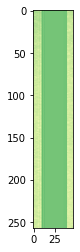

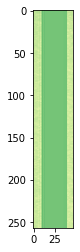

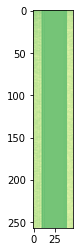

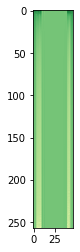

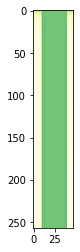

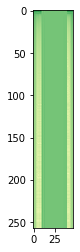

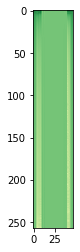

torch.Size([7, 257, 47])

In [74]:
def mask_along_axis(
        specgram,
        mask_start: int,
        mask_end: int,
        mask_value: float,
        axis: int
):
    r"""
    Apply a mask along ``axis``. Mask will be applied from indices ``[v_0, v_0 + v)``, where
    ``v`` is sampled from ``uniform(0, mask_param)``, and ``v_0`` from ``uniform(0, max_v - v)``.
    All examples will have the same mask interval.

    Args:
        specgram (Tensor): Real spectrogram (channel, freq, time)
        mask_param (int): Number of columns to be masked will be uniformly sampled from [0, mask_param]
        mask_value (float): Value to assign to the masked columns
        axis (int): Axis to apply masking on (1 -> frequency, 2 -> time)

    Returns:
        Tensor: Masked spectrogram of dimensions (channel, freq, time)
    """

    
    mask_start = (torch.tensor(mask_start).long()).squeeze()
    mask_end = (torch.tensor(mask_end).long()).squeeze()
    
    if axis == 1:
        specgram[:, mask_start:mask_end, :, :] = mask_value
    elif axis == 2:
        specgram[:, :, mask_start:mask_end, :] = mask_value
    else:
        raise ValueError('Only Frequency and Time masking are supported')
    print(specgram)
    specgram = specgram.reshape(specgram.shape[:-2] + specgram.shape[-2:])

    return specgram

class Policy:

    def __init__(self, policy_type: str, args):
        self.policy_type = policy_type
        self.args = args

    def apply(self, spectrogram):
        if self.policy_type == "axis_mask":
            return(mask_along_axis(spectrogram, self.args["mask_start"], self.args["mask_end"], self.args["mask_value"], self.args["axis"]))
        # if type = "axis_warp":
        #    return(warp_along_axis())
        
args= {"mask_start": 10,
       "mask_end": 40,
       "mask_value": 1,
       "axis": 2}
policy_type = "axis_mask"
policy = Policy(policy_type, args)
spec = transform(test, [policy])



In [69]:
spec[-1]

tensor([[[ 9.4137e+04,  0.0000e+00],
         [ 8.4416e+04,  0.0000e+00],
         [ 6.1018e+04,  0.0000e+00],
         ...,
         [ 2.4112e+05,  0.0000e+00],
         [ 2.4459e+05,  0.0000e+00],
         [ 2.4742e+05,  0.0000e+00]],

        [[-7.8684e+04, -1.3126e-03],
         [-5.3949e+04, -3.8481e+04],
         [-1.5369e+04, -3.3202e+04],
         ...,
         [-1.1903e+05,  1.0429e+02],
         [-1.1899e+05,  4.7694e+03],
         [-1.2601e+05,  6.2384e+03]],

        [[ 5.1914e+04,  9.2683e-04],
         [ 7.9826e+03,  4.5513e+04],
         [-2.9887e+04,  1.1327e+04],
         ...,
         [-3.0527e+03,  7.1572e+03],
         [-7.2195e+03, -4.7812e+03],
         [ 3.9530e+03, -7.5854e+03]],

        ...,

        [[ 3.2216e+00, -2.4508e-05],
         [-1.3420e-04, -2.7498e+00],
         [-1.6107e+00,  1.3990e-04],
         ...,
         [-1.2884e-01, -5.7705e-01],
         [-1.7067e+00,  3.8295e-01],
         [ 6.1524e-01,  2.7381e+00]],

        [[-3.2212e+00,  2.5318e-06

In [70]:
pd.Series(spec.numpy().reshape((1,-1))[0]).sort_values()

NameError: name 'pd' is not defined

In [14]:
print(spec.shape)

torch.Size([7, 257, 47, 2])


In [24]:
%debug

> <ipython-input-21-ce8b7afc343e>(1)<module>()
----> 1 from braindecode.datautil import mask_along_axis

ipdb> c


In [21]:
from braindecode.datautil import mask_along_axis

ImportError: cannot import name 'mask_along_axis' from 'braindecode.datautil' (/home/parietal/sfreybur/miniconda3/lib/python3.7/site-packages/braindecode/datautil/__init__.py)

In [2]:
from braindecode.datautil import *

In [57]:
import sys
sys.executable

'/home/parietal/sfreybur/miniconda3/bin/python'

In [6]:
import braindecode
print(braindecode.__file__)

/home/parietal/sfreybur/miniconda3/lib/python3.7/site-packages/braindecode/__init__.py


In [62]:
!python /storage/store/work/sfreybur/braindecode/setup.py develop

running develop
running egg_info
writing Braindecode.egg-info/PKG-INFO
writing dependency_links to Braindecode.egg-info/dependency_links.txt
writing requirements to Braindecode.egg-info/requires.txt
writing top-level names to Braindecode.egg-info/top_level.txt
reading manifest file 'Braindecode.egg-info/SOURCES.txt'
writing manifest file 'Braindecode.egg-info/SOURCES.txt'
running build_ext
Creating /home/parietal/sfreybur/miniconda3/lib/python3.7/site-packages/Braindecode.egg-link (link to .)
Braindecode 0.5 is already the active version in easy-install.pth

Installed /storage/store/work/sfreybur/FastAutoAugmentForEEG
Processing dependencies for Braindecode==0.5
Searching for skorch==0.8.0
Best match: skorch 0.8.0
Adding skorch 0.8.0 to easy-install.pth file

Using /home/parietal/sfreybur/miniconda3/lib/python3.7/site-packages
Searching for h5py==2.10.0
Best match: h5py 2.10.0
Adding h5py 2.10.0 to easy-install.pth file

Using /home/parietal/sfreybur/miniconda3/lib/python3.7/site-packa

In [11]:
import sys
sys.executable

'/home/parietal/sfreybur/miniconda3/bin/python'

In [36]:
import torch
a = torch.arange(9, dtype= torch.float) - 4
b = a.reshape((3, 3))
print(torch.norm(a))
print(torch.norm(b))

tensor(7.7460)
tensor(7.7460)


In [37]:
print(torch.norm(a, float('inf')))
print(torch.norm(b, float('inf')))

tensor(4.)
tensor(4.)


In [40]:
c = torch.tensor([[ 1, 2, 3],[-1, 1, 4]] , dtype= torch.float)
print(torch.norm(c, dim=0))
print(torch.norm(c, dim=1))
print(torch.norm(c, p=1, dim=1))

tensor([1.4142, 2.2361, 5.0000])
tensor([3.7417, 4.2426])
tensor([6., 6.])


In [42]:
d = torch.arange(24, dtype= torch.float).reshape(2,3,4)
d

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

In [47]:
torch.norm(d, dim=2)



tensor([[ 3.7417, 11.2250, 19.1311],
        [27.0924, 35.0714, 43.0581]])